In [1]:
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from shutil import copyfile

In [2]:
DATASET_DIR = "./dataset/original/"
TRAIN_DIR = './dataset/train/'
TEST_DIR = './dataset/test/'
VAL_DIR = './dataset/val/'
TRAIN_SIZE = 0.9  
# VALIDATION_SIZE = 0.1 
TEST_SIZE = 0.1

In [3]:
image_dir = Path(DATASET_DIR)

filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.jpeg')) + list(image_dir.glob(r'**/*.PNG'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

image_df = pd.concat([filepaths, labels], axis=1)

image_df = image_df.drop_duplicates(subset=['Filepath', 'Label'])

print(f"Datasets amount = {len(image_df)}")

Datasets amount = 17494


In [4]:
labels_desired = image_df['Label'].isin(os.listdir(DATASET_DIR))
image_df = image_df[labels_desired].reset_index(drop=True)
image_df

,Filepath,Label
0,..\RA_PAPER\data\original\cbb\1000015157.jpg,cbb
1,..\RA_PAPER\data\original\cbb\1001320321.jpg,cbb
2,..\RA_PAPER\data\original\cbb\1003888281.jpg,cbb
3,..\RA_PAPER\data\original\cbb\1012426959.jpg,cbb
4,..\RA_PAPER\data\original\cbb\1018973237.jpg,cbb
...,...,...
17489,..\RA_PAPER\data\original\healthy\train-health...,healthy
17490,..\RA_PAPER\data\original\healthy\train-health...,healthy
17491,..\RA_PAPER\data\original\healthy\train-health...,healthy
17492,..\RA_PAPER\data\original\healthy\train-health...,healthy


In [5]:
image_df_label_counts = image_df['Label'].value_counts()

print("Dataset:")
print(image_df_label_counts)

Dataset:
cgm        3676
cmd        3648
healthy    3624
cbsd       3440
cbb        3106
Name: Label, dtype: int64


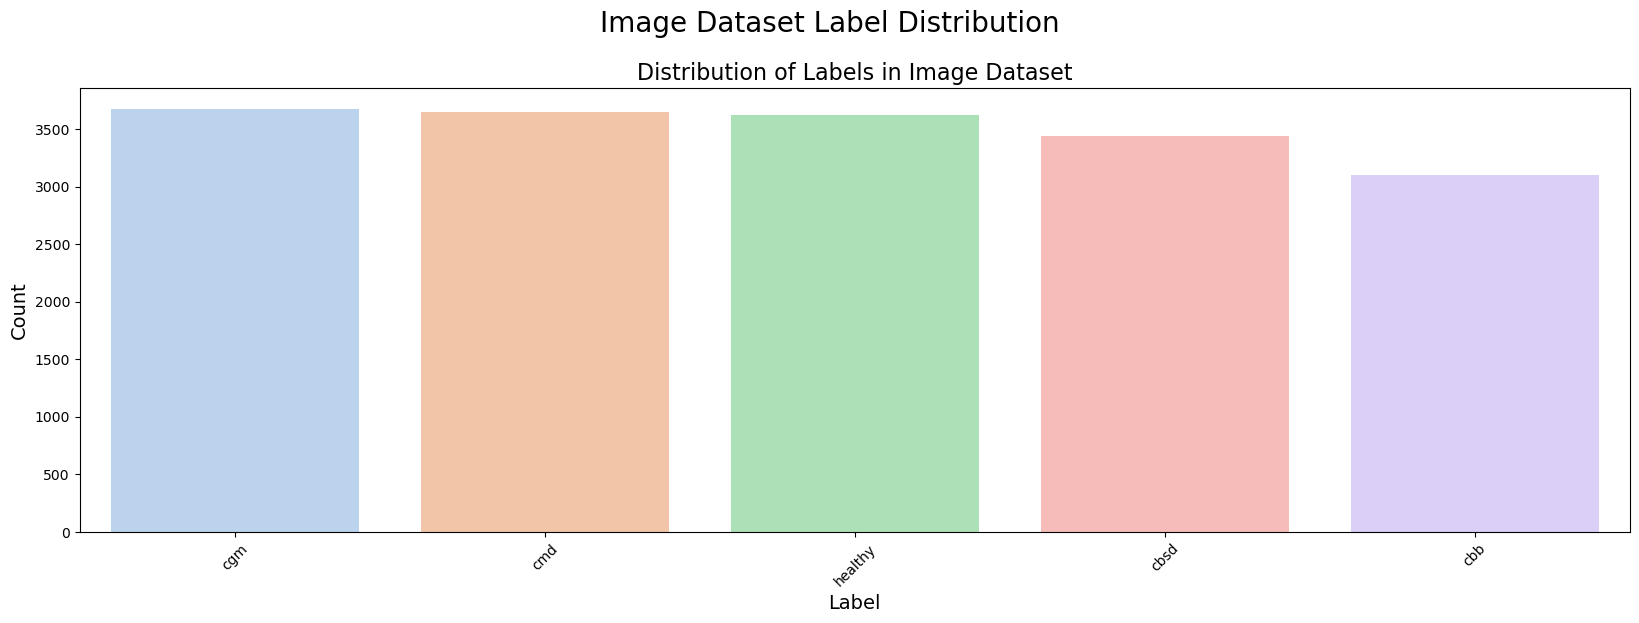

In [6]:
label_counts = image_df['Label'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 6))

sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8, palette='pastel', ax=axes)
axes.set_title('Distribution of Labels in Image Dataset', fontsize=16)
axes.set_xlabel('Label', fontsize=14)
axes.set_ylabel('Count', fontsize=14)
axes.set_xticklabels(label_counts.index, rotation=45)

fig.suptitle('Image Dataset Label Distribution', fontsize=20)

fig.subplots_adjust(top=0.85)

# Display the plot
plt.show()

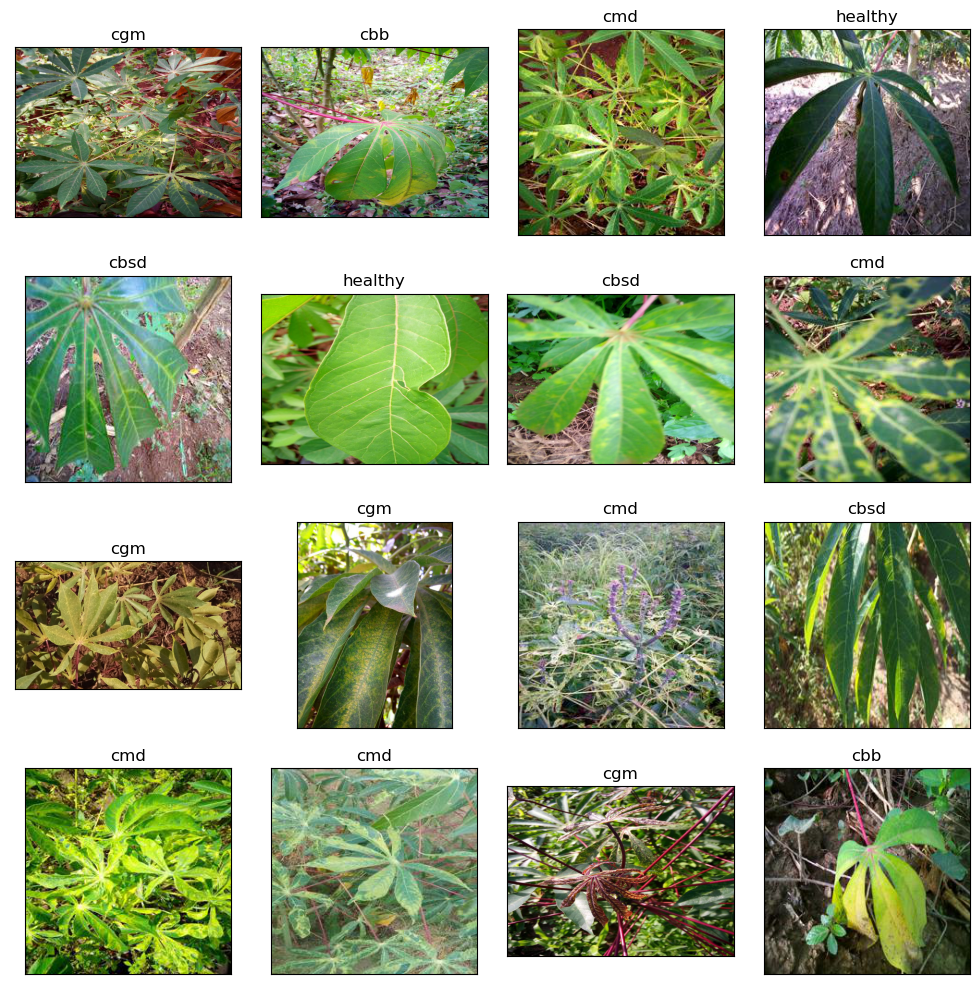

In [7]:
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show()

In [8]:
os.makedirs(TRAIN_DIR, exist_ok=True)
os.makedirs(TEST_DIR, exist_ok=True)
# os.makedirs(VAL_DIR, exist_ok=True)

labels = image_df['Label'].unique()

for label in labels:
    os.makedirs(os.path.join(TRAIN_DIR, label), exist_ok=True)
    os.makedirs(os.path.join(TEST_DIR, label), exist_ok=True)
    # os.makedirs(os.path.join(VAL_DIR, label), exist_ok=True)

In [9]:
# train_df, rest_df = train_test_split(image_df, test_size=(VALIDATION_SIZE + TEST_SIZE), shuffle=True, random_state=2023)
train_df, test_df = train_test_split(image_df, test_size=(TEST_SIZE), shuffle=True, random_state=2023)

# val_df, test_df = train_test_split(rest_df, test_size=(TEST_SIZE / (VALIDATION_SIZE + TEST_SIZE)), shuffle=True, random_state=2023)

In [10]:
train_label_counts = train_df['Label'].value_counts()
test_label_counts = test_df['Label'].value_counts()
# val_label_counts = val_df['Label'].value_counts()

print("Train Set:")
print(train_label_counts)
print(f"Sum: {sum(train_label_counts)}")

# print("\nVal Set:")
# print(val_label_counts)
# print(f"Sum: {sum(val_label_counts)}")

print("\nTest Set:")
print(test_label_counts)
print(f"Sum: {sum(test_label_counts)}")

Train Set:
cgm        3302
cmd        3288
healthy    3280
cbsd       3095
cbb        2779
Name: Label, dtype: int64
Sum: 15744

Test Set:
cgm        374
cmd        360
cbsd       345
healthy    344
cbb        327
Name: Label, dtype: int64
Sum: 1750


In [11]:
for _, row in tqdm(train_df.iterrows(), total=len(train_df)):
    source_path = os.path.join(row['Filepath'])
    destination_path = os.path.join(TRAIN_DIR, row['Label'], os.path.basename(row['Filepath']))
    copyfile(source_path, destination_path)

# for _, row in tqdm(val_df.iterrows(), total=len(val_df)):
#     source_path = os.path.join(row['Filepath'])
#     destination_path = os.path.join(VAL_DIR, row['Label'], os.path.basename(row['Filepath']))
#     copyfile(source_path, destination_path)
    
for _, row in tqdm(test_df.iterrows(), total=len(test_df)):
    source_path = os.path.join(row['Filepath'])
    destination_path = os.path.join(TEST_DIR, row['Label'], os.path.basename(row['Filepath']))
    copyfile(source_path, destination_path)

100%|██████████| 1750/1750 [00:12<00:00, 135.83it/s]
